In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [23]:
t = torch.linspace(0, 1, 4)
ts = torch.linspace(0, 1, 50)
p = torch.rand(4)

In [4]:
def cubic_bezier(p, ts):
    return (1-ts)**3*p[0] + 3*(1-ts)**2*ts*p[1]+3*(1-ts)*ts**2*p[2]+ts**3*p[3]

In [62]:
def cubic_bezier_arc_3D(px, py, pz, unit_arc=0.1):
    t = 0
    ts = torch.tensor([0])
    while t <= 1:
        dx = 3*(1 - t)**2 * (px[1] - px[0]) + 6 * (1-t) * t * (px[2] - px[1]) + 3*t**2*(px[3] - px[2])
        dy = 3*(1 - t)**2 * (py[1] - py[0]) + 6 * (1-t) * t * (py[2] - py[1]) + 3*t**2*(py[3] - py[2])
        dz = 3*(1 - t)**2 * (pz[1] - pz[0]) + 6 * (1-t) * t * (pz[2] - pz[1]) + 3*t**2*(pz[3] - pz[2])

        dt = unit_arc / torch.sqrt(dx**2 + dy**2 + dz**2)

        t = t + dt

        ts = torch.hstack((ts, t))
    ts = ts[:-1]
    xs = cubic_bezier(px, ts)
    ys = cubic_bezier(py, ts)
    zs = cubic_bezier(pz, ts)

    return torch.vstack((xs, ys, zs))
        


In [5]:
b = cubic_bezier(p, ts)

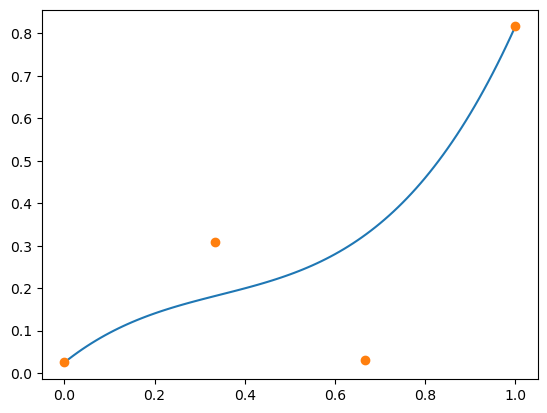

In [6]:
plt.plot(ts, b)
plt.plot(t, p, 'o')

In [7]:
p_con = torch.rand(4).requires_grad_(True)

In [8]:
optimizer = torch.optim.SGD([p_con], lr=0.01)

In [9]:
def loss_fn(target, predict):
    return torch.norm(target - predict)

In [10]:
loss_array = []
pre_loss = 100
for i in range(1000):
    b_pre = cubic_bezier(p_con, ts)
    # x_pre = cubic_interp(coff, u, us)

    loss = loss_fn(b_pre, b)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if abs(loss.detach() - pre_loss) < 0.0001:
        loss_array.append(loss.detach())
        break
    pre_loss = loss.detach()
    loss_array.append(pre_loss)

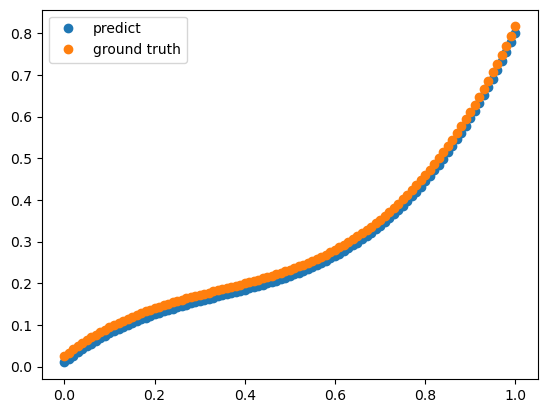

In [11]:
plt.plot(ts, b_pre.detach(), 'o', label='predict')
plt.plot(ts, b, 'o', label='ground truth')
plt.legend()

In [60]:
x_con = torch.tensor([0.000224, -0.0002, -0.0017, 0.0004])
y_con = torch.tensor([0.010794, 0.0112, 0.0093, 0.0042])
z_con = torch.tensor([-0.001233, 0.005, 0.0122, 0.0085])

In [58]:
x_con = torch.rand(4)
y_con = torch.rand(4)
z_con = torch.rand(4)

In [70]:
xyzs = cubic_bezier_arc_3D(x_con, y_con, z_con, 0.0005)

In [71]:
xyzs.shape

torch.Size([3, 31])

In [67]:
dx = xyzs[0][1:] - xyzs[0][:-1]
dy = xyzs[1][1:] - xyzs[1][:-1]
dz = xyzs[2][1:] - xyzs[2][:-1]

In [68]:
torch.sqrt(dx**2 + dy**2 + dz**2)

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010,
        0.0010, 0.0009, 0.0010, 0.0010, 0.0011, 0.0011])

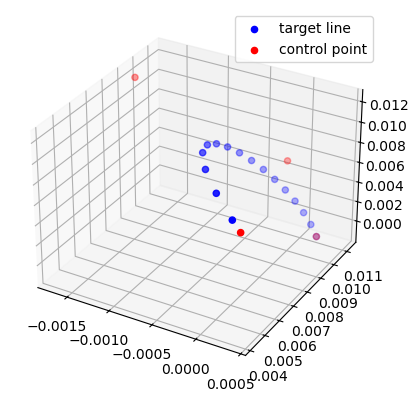

In [69]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(xyzs[0], xyzs[1], xyzs[2], c='b', label='target line')
ax.scatter(x_con, y_con, z_con, c='r', label='control point')
ax.legend()

In [54]:
x_pre = torch.rand(4).requires_grad_(True)
y_pre = torch.rand(4).requires_grad_(True)
z_pre = torch.rand(4).requires_grad_(True)

In [55]:
optimizer = torch.optim.SGD([x_pre, y_pre, z_pre], lr=0.01)

In [56]:
loss_array = []
pre_loss = 100
for i in range(1000):
    b_pre = cubic_bezier_arc_3D(x_pre, y_pre, z_pre, 0.01)
    # x_pre = cubic_interp(coff, u, us)

    loss = loss_fn(b_pre, xyzs)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if abs(loss.detach() - pre_loss) < 0.0001:
        loss_array.append(loss.detach())
        break
    pre_loss = loss.detach()
    loss_array.append(pre_loss)

RuntimeError: The size of tensor a (140) must match the size of tensor b (99) at non-singleton dimension 1